# Lab 5

by Vsevolod Klyushev

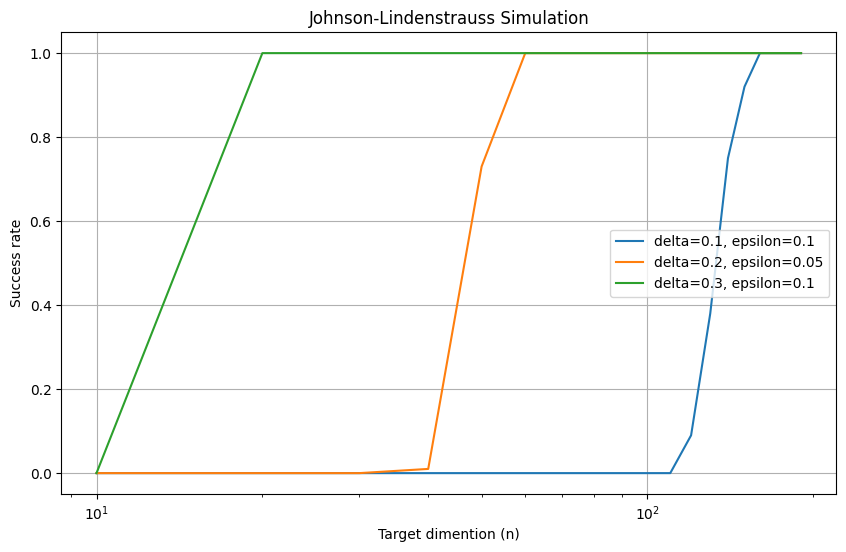

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def simulation(N, d, n, delta, epsilon, num_trials=100):
    X = np.random.randn(N, d)
    
    count = 0
    
    for _ in range(num_trials):
        R = np.random.randn(d, n) / np.sqrt(n)
        Y = np.dot(X, R)
        
        # Distance matrices (from each point to another)
        original = cdist(X, X, 'euclidean')
        projected = cdist(Y, Y, 'euclidean')
        
        lower_bound = (1 - delta) * original
        upper_bound = (1 + delta) * original
        
        # check for each pair of i and j whether condition holds
        condition = np.logical_and(projected >= lower_bound, projected <= upper_bound)
        # Check upper triangle of conditions matrix, since in that part there would be all pairs of i and j s.t. i!=j without repetitions
        success_rate = np.sum(condition[np.triu_indices(N, k=1)])/len(condition[np.triu_indices(N, k=1)])
        
        if success_rate >= 1 - epsilon:
            count += 1

    return count / num_trials

N = 100
d = 1000
n_values = np.arange(10, 200, 10)
delta_epsilon_pairs = [(0.1, 0.1), (0.2, 0.05), (0.3, 0.1)]

results = {}
for delta, epsilon in delta_epsilon_pairs:
    success_rates = []
    for n in n_values:
        success_rate = simulation(N, d, n, delta, epsilon)
        success_rates.append(success_rate)
    results[(delta, epsilon)] = success_rates

plt.figure(figsize=(10, 6))
for (delta, epsilon), success_rates in results.items():
    plt.plot(n_values, success_rates, label=f'delta={delta}, epsilon={epsilon}')

plt.xscale('log')
plt.xlabel('Target dimention (n)')
plt.ylabel('Success rate')
plt.title('Johnson-Lindenstrauss Simulation')
plt.legend()
plt.grid(True)
plt.show()

## Conclusions

As we can see, Johnson-Lindenstrauss works and we can state, that the lower the $\delta$ and $\epsilon$, the lower the probabilities of the success transformation. We can also state, that $delta$ highly influence on starting dimention, when epsilon has some influence on slope of the lines.
